#### Collocate and cut imagery

In [31]:
with open('../env.txt') as f:
    ENVIRONMENT = f.readlines()[0][:-1]
print(f'running on environment: "{ENVIRONMENT}"')
assert ENVIRONMENT in ['blaze',
                       'colab',
                       'local',
                       'cpom']

import sys
if ENVIRONMENT == 'cpom':
    sys.path.append('/home/cb/.snap/snap-python')
elif ENVIRONMENT == 'local':
    sys.path.append('/Users/christianboehm/.snap/snap-python')
else:
    print("snappy is only available on CPOM and possibly local machines")


running on environment: "local"


In [32]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import snappy
from snappy import ProductIO
from snappy import jpy
HashMap = snappy.jpy.get_type('java.util.HashMap')

sys.path.append('../')
import sis_helper as helper
import snap

if ENVIRONMENT == 'cpom':
    PATH_DATA = '/home/cb/sis2/data/'
elif ENVIRONMENT == 'local':
    PATH_DATA = '/Users/christianboehm/projects/sis2/data/'


In [33]:

TILESIZE = 960


In [34]:
img_pairs_inventory = pd.read_csv(os.path.join(PATH_DATA, 'inventory/img_pairs.csv'))
img_pairs_inventory


FileNotFoundError: [Errno 2] No such file or directory: '/Users/christianboehm/projects/sis2/data/inventory/img_pairs.csv'

In [5]:
# Open existing or create new dataframe to store tile-level results
if os.path.exists(os.path.join(PATH_DATA, f'inventory/file_inventory.csv')):
    file_inventory = pd.read_csv(os.path.join(PATH_DATA, f'inventory/file_inventory.csv'))
else:
    file_inventory = pd.DataFrame(columns=['s2', 's3', 'status'])


In [6]:
file_inventory

,s2,s3,status


In [30]:
row = img_pairs_inventory.iloc[20]
if row['s2'] in list(file_inventory['s2']):
    IMG_INDEX = file_inventory.loc[file_inventory['s2'] == row['s2']].index[0]
    print(f'found index {IMG_INDEX}')
else:
    file_inventory = file_inventory.append({'s2': row['s2'],
                           's3': row['s3'],
                           'status': 'new'},
                           ignore_index=True)
    IMG_INDEX = file_inventory.index[-1]
    print(f'appended index {IMG_INDEX}')


NameError: name 'img_pairs_inventory' is not defined

In [16]:
file_inventory

,s2,s3,status
0,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,new
1,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,new


In [17]:
### DO ALL FOLLOWING ONLY IF STATUS = NEW
assert file_inventory['status'].iloc[IMG_INDEX] == 'new'


In [18]:
S2_FILE = row['s2']
S3_FILE = row['s3']


In [24]:
row['s2']

'/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_2/DATA/S2B_MSIL1C_20220428T173859_N0400_R098_T17XPA_20220428T205006.SAFE'

In [25]:
row['s3']


'/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_3/OLCI/2022/04/S3A_OL_1_EFR____20220429T145217_20220429T145517_20220430T193645_0179_084_353_1620_MAR_O_NT_002.SEN3'

In [19]:
# def get_collocated_image(S2_FILE, S3_FILE):

# Reading raw images
s2_raw = ProductIO.readProduct(S2_FILE)
s3_raw = ProductIO.readProduct(S3_FILE)


In [ ]:
snap.check_overlap(s2_raw, s3_raw)


In [ ]:

s2_bands = snap.band_subset(s2_raw, 'B2,B3,B4,B_opaque_clouds')
s3_bands = snap.band_subset(s3_raw, 'Oa01_radiance,Oa02_radiance,Oa03_radiance,Oa04_radiance,Oa05_radiance,Oa06_radiance,Oa07_radiance,Oa08_radiance,Oa09_radiance,Oa10_radiance,Oa11_radiance,Oa12_radiance,Oa13_radiance,Oa14_radiance,Oa15_radiance,Oa16_radiance,Oa17_radiance,Oa18_radiance,Oa19_radiance,Oa20_radiance,Oa21_radiance')
s2_bands = snap.resample(s2_bands, 'B2')
collocated = snap.collocate(s2_bands, s3_bands)
collocated = snap.band_subset(collocated,'B2,B3,B4,Oa01_radiance,Oa02_radiance,Oa03_radiance,Oa04_radiance,Oa05_radiance,Oa06_radiance,Oa07_radiance,Oa08_radiance,Oa09_radiance,Oa10_radiance,Oa11_radiance,Oa12_radiance,Oa13_radiance,Oa14_radiance,Oa15_radiance,Oa16_radiance,Oa17_radiance,Oa18_radiance,Oa19_radiance,Oa20_radiance,Oa21_radiance,B_opaque_clouds,quality_flags,collocationFlags')

s2_raw.dispose()
s3_raw.dispose()
s2_bands.dispose()
s3_bands.dispose()


In [9]:
# S2_FILE = '/home/cb/sis2/data/s2/S2A_MSIL1C_20230610T110621_N0509_R137_T30UXC_20230610T144925.zip'
# S3_FILE = '/home/cb/sis2/data/s3/S3A_OL_1_EFR____20230604T163655_20230604T163955_20230605T174557_0179_099_297_1620_PS1_O_NT_003.SEN3'

# S2_FILE = '/Users/christianboehm/projects/sis2/data/s2/S2A_MSIL1C_20230604T172901_N0509_R055_T17XNB_20230604T211530.zip'
# S3_FILE = '/Users/christianboehm/projects/sis2/data/s3/S3A_OL_1_EFR____20230604T163655_20230604T163955_20230605T174557_0179_099_297_1620_PS1_O_NT_003.SEN3'

s2_raw = ProductIO.readProduct(S2_FILE)
s3_raw = ProductIO.readProduct(S3_FILE)


INFO: org.esa.s2tbx.dataio.s2.ortho.S2OrthoProductReaderPlugIn: Building product reader - EPSG:32617


In [20]:
bandnames = ['B2',
         'B3',
         'B4',
         'Oa01_radiance',
         'Oa02_radiance',
         'Oa03_radiance',
         'Oa04_radiance',
         'Oa05_radiance',
         'Oa06_radiance',
         'Oa07_radiance',
         'Oa08_radiance',
         'Oa09_radiance',
         'Oa10_radiance',
         'Oa11_radiance',
         'Oa12_radiance',
         'Oa13_radiance',
         'Oa14_radiance',
         'Oa15_radiance',
         'Oa16_radiance',
         'Oa17_radiance',
         'Oa18_radiance',
         'Oa19_radiance',
         'Oa20_radiance',
         'Oa21_radiance']


In [21]:
tile_inventory, tile_list, quality_list = snap.cut_tiles(collocated, TILESIZE, IMG_INDEX, row['s2'], PATH_DATA)
# tile_inventory.head(50)
# tile_inventory[tile_inventory['status'] == 'ok']


In [14]:
tile_list.keys()

dict_keys(['20x20', '20x1018', '20x2016', '20x3014', '1018x20', '1018x1018', '1018x2016', '2016x1018', '3014x20', '3014x1018', '4012x20'])

In [22]:
# for tilecode in tile_list.keys():

tilecode = '2016x1018'

print(tilecode)
tile = tile_list[tilecode]
# stack = None
# for bandname in bandnames:
#     print(bandname)
#     band_data = snap.nparray(tile, bandname)
# # snap.plot_tile(tile_list[tilecode])

2016x1018


In [ ]:
file_inventory.at[IMG_INDEX, f'status_{TILESIZE}'] = 'created'


In [35]:
file_inventory

,s2,s3,status_960
0,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,created


In [38]:
tile_inventory

,img_index,tile,size,status,comment
0,00000,20x20,960,created,NaN
1,00000,20x1018,960,created,NaN
2,00000,20x2016,960,created,NaN
3,00000,20x3014,960,created,NaN
4,00000,20x4012,960,created,NaN
...,...,...,...,...,...
479,00000,10000x6008,960,error,org.esa.snap.core.gpf.OperatorException: gridW...
480,00000,10000x7006,960,error,org.esa.snap.core.gpf.OperatorException: gridW...
481,00000,10000x8004,960,error,org.esa.snap.core.gpf.OperatorException: gridW...
482,00000,10000x9002,960,error,org.esa.snap.core.gpf.OperatorException: gridW...


In [41]:
# tile = tile_list[list(tile_list.keys())[15]]
tile = quality_list['20x4012']

In [28]:
import importlib
importlib.reload(snap)


<module 'snap' from '/Users/christianboehm/projects/sis2/preprocessing/snap.py'>

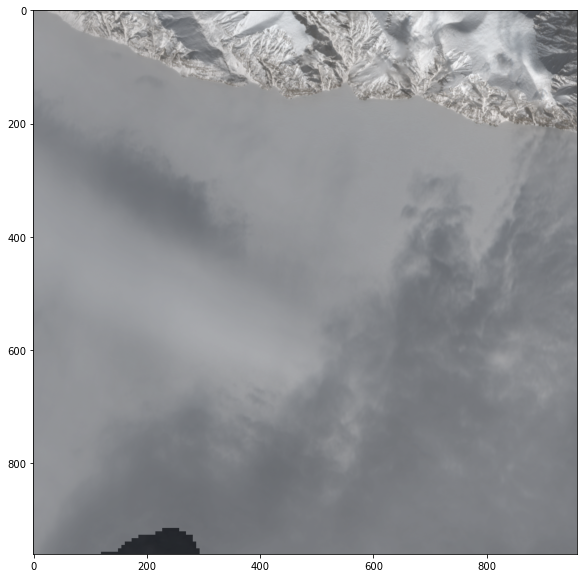

In [23]:
snap.plot_tile(tile, cloudmask=True)
